## 분류 알고리즘
|종류|모델|
|:-----:|:------------:|
|트리 구조 기반|의사 결정 나무, 랜덤 포레스트, ...|
|확률 모델 기반|나이브 베이즈 분류기, ...|
|결정 경계 기반|선형 분류기, 로지스틱 회귀 분류기, SVM, ...|
|신경망|퍼셉트론, 딥러닝 모델, ...|

### 의사결정나무(Decision Tree)

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FwlH1u%2FbtqwWZI9Xen%2FkFJDjGSFJAPxhyatC3Xhs0%2Fimg.png)

- 최상단의 뿌리 마디(Root Node)에서 마지막 끝 마디(Terminal Node 또는 Leaf Node)까지 아래 방향으로 진행

### 지니불순도(Gini impurity)

- 다른 데이터가 섞여 있는 정도

![](https://i0.wp.com/smalldataguru.com/wp-content/uploads/2019/02/img-1.png?resize=768%2C207&ssl=1)

![](https://i0.wp.com/smalldataguru.com/wp-content/uploads/2019/02/Screen-Shot-2019-02-23-at-11.26.04-PM.png?resize=768%2C424&ssl=1)

지니 불순도는 클래스안에 분류가 완벽하게 잘 되어 있으면 아래의 공식에 따라 0 이 된다. 즉 불순물없이 깨끗하게 분류가 되어 있다는 것이다. 하지만 섞이게 되면 0보다 큰 값을 가지게 되고, 최댓값은 0.5 이다. 

 이를 구하는 공식은 $$1 - \sum_{j=1}^{J}(p_j(1-p_j))$$

 와 같다.  
p
 는 0~1 사이의 값을 가지는 확률 값인데 위의 예제를 들면, 파란 구슬이 들어있는 비율 
p
 빨간 구슬의 비율 
(
1
−
p
)
 라고 보면 된다. 이 식을 토대로 예를 들어 보자.

 

만약에 구슬 10개 중에서 파란구슬이 3개가 있다면 지니불순도는 어떻게 될까?
$$1 - ((\frac{3}{10})^2 + (\frac{7}{10})^2) = 0.42$$

 로 지니계수가 0.42가 되며 42% 정도의 불순도를 구한다. 앞서 말했듯 지니계수는 의사결정나무에서 변수를 토대로 종속변수의 클래스를 분류하기 위해서 매 가지마다 지니계수를 활용하여 독립변수를 쪼개며 케이스들을 갈라나간다. 

[참고]https://data-science-hi.tistory.com/59

$$ Gini Index = 1 - (yes의 확률)^2 - (no의 확률)^2 $$
$$ Gini Impurity = \frac{n_1}{N}Gini_1 + \frac{n_2}{N}Gini_2 $$

- $n_i$: i번째 자식 마디의 데이터 개수
- N : 부모 마디의 데이터 개수

### 의사결정나무의 깊이의 trade-off

- 의사결정나무의 깊이가 깊어질 수록 세분화해서 나눌 수 있음
- 하지만 너무 깊은 모델은 과적합을 야기할 수 있음(데이터에 따라 다를 수 있지만, 너무 깊은 모델은 지양)

### 의사결정나무의 특징
- 결과가 직관적이며, 해석하기 쉬움
- 나무 깊이가 깊어질수록 과적합(Overfitting) 문제 발생 가능성이 매우 높음
- 학습이 끝난 트리의 작업 속도가 매우 빠르다

### 혼동 행렬(Confusion Matrix)

- 분류 모델의 성능을 평가하기 위함
![](https://w.namu.la/s/e8e4a30faead7fdb08c2612e603ee41f80a59a6c7e84dfa8fc78ea94c8663e3da580c5ee84f945b05f3e1cd840bad93e443fa6de74db7bd3fe0833dedc30ad8146fd29174baaef369f95bb71cf87174032455bc620148bb730ab644e0bc54f8f)



- True Positive : 실제 Positive인 값을 Positive라고 예측(정답)
- True Negative : 실제 Negative인 값을 Negative라고 예측(정답)


- False Positive : 실제 Negative인 값을 Positive라고 예측(오답) - 1형 오류
- False Negative : 실제 Positive인 값을 Negative라고 예측(오답) - 2형 오류

#### 정확도(Accuracy)
    - 전체 데이터 중에서 제대로 분류된 데이터의 비율로, 모델이 얼마나 정확하게 분류하는 지를 나타냄
    - 일반적으로 분류 모델의 주요 평가 방법으로 사용됨
    - 그러나, 클래스 비율이 불균형 할 경우 평가 지표의 신뢰성을 잃을 가능성이 있음

#### 정밀도(Precision)
    - 모델이 Positive라고 분류한 데이터 중에서 실제로 Positive인 데이터의 비율
    - Negative가 중요한 경우, 즉, 실제로 Negative인 데이터를 Positive라고 판단하면 안되는 경우 사용되는 지표
    - 예를 들면, 스팸 메일 판결을 위한 분류 문제로, 해당 메일이 스팸일 경우를 Positive, 스팸이 아닐 경우(일반 메일일 경우)를 Negative일 때, 일반 메일을 스팸 메일(Positive)로 잘못 예측했을 경우 중요한 메일을 전달받지 못하는 상황이 발생할 수 있음

#### 재현율
    - 실제로 Positive인 데이터 중에서 모델이 Positive로 분류한 데이터의 비율
    - Positive가 중요한 경우, 즉, 실제로 Positive인 데이터를 Negative라고 판단하면 안되는 경우 사용되는 지표
    - 예를 들면, 악성 종양 여부 판결을 위한 검사로, 악성 종양일 경우 Positive, 악성 종양이 아닐 경우(양성 종양일 경우) Negative일 때, 악성 종양(Positive)을 양성 종양(Negative)으로 잘못 예측했을 경우 제 때 치료를 받지 못하게 되어 생명이 위급해 질 수 있음

#### 다양한 분류 지표의 활용

- 분류 목적에 따라 다양한 지표를 계산하여 평가
    - 분류 결과를 전체적으로 보고 싶다면, 혼동 행렬(Confusion Matrix)
    - 정답을 얼마나 잘 맞췄는지, 정확도(Accuracy)
    - FP 또는 FN의 중요도가 높다면, 정밀도(Precision), 재현율(Recall)

## 실습 1. 간단한 의사결정나무 만들기

- 이번 실습에서는 이론 자료에서 나왔던 항공 지연 데이터를 기반으로 간단한 의사결정나무를 구현해 보겠습니다.

- 항공 지연 데이터는 아래와 같습니다.
![](https://cdn-api.elice.io/api-attachment/attachment/8325d20c876a4928ab7e0f984ae294a5/image.png)

- 풍속에 따른 지연 여부를 알아내기 위하여 의사결정나무인 `binary_tree`의 기준값(`threshold`)을 변경해가며 완벽하게 지연 여부를 분리할 수 있는 모델을 만들어봅시다.
![](https://cdn-api.elice.io/api-attachment/attachment/9c7a07bb4b374297829419e0ea4a5db8/image.png)

#### 지시사항
1. `binary_tree` 함수는 입력하는 `threshold` 풍속을 기준으로 지연 여부를 예측한 결과를 DataFrame 형태로 출력합니다. `data`의 `지연 여부`와 `예상 지연 여부`가 같은 값이 나오도록 의사결정나무의 결과물을 data_pred에 저장하세요.
    * threshold 에 값을 넣어서 결과를 확인합니다. (ex) 1, 2, 3.5, …)

In [2]:
import numpy as np
import pandas as pd

# 풍속을 threshold 값에 따라 분리하는 의사결정나무 모델 함수
def binary_tree(data, threshold):
    
    yes = []
    no = []
    
    # data로부터 풍속 값마다 비교를 하기 위한 반복문
    for wind in data['풍속']:
    
        # threshold 값과 비교하여 분리합니다.
        if wind > threshold:
            yes.append(wind)
        else:
            no.append(wind)
    
    # 예측한 결과를 DataFrame 형태로 저장합니다.
    data_yes = pd.DataFrame({'풍속': yes, '예상 지연 여부': ['Yes']*len(yes)})
    data_no = pd.DataFrame({'풍속': no, '예상 지연 여부': ['No']*len(no)})
    
    return data_no.append(data_yes,ignore_index=True)

In [3]:
# 풍속에 따른 항공 지연 여부 데이터
Wind = [1, 1.5, 2.5, 5, 5.5, 6.5]
Delay  = ['No', 'No', 'No', 'Yes', 'Yes', 'Yes']

# 위 데이터를 DataFrame 형태로 저장합니다.
data = pd.DataFrame({'풍속': Wind, '지연 여부': Delay})
print(data,'\n')

    풍속 지연 여부
0  1.0    No
1  1.5    No
2  2.5    No
3  5.0   Yes
4  5.5   Yes
5  6.5   Yes 



In [4]:
"""
1. binary_tree 모델을 사용하여 항공 지연 여부를 예측합니다.
"""
data_pred = binary_tree(data, threshold = 4)
print(data_pred,'\n')

    풍속 예상 지연 여부
0  1.0       No
1  1.5       No
2  2.5       No
3  5.0      Yes
4  5.5      Yes
5  6.5      Yes 



## 실습 2. sklearn을 사용한 의사결정나무 - 데이터 전 처리

- 이번 실습에서는 분류 문제 해결을 위해 Iris 데이터를 사용합니다. Iris 데이터는 아래와 같이 꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이 네 가지 변수와 세 종류의 붓꽃 클래스로 구성되어 있습니다.

![](https://cdn-api.elice.io/api-attachment/attachment/6647a6bc70ca4a329b13b5827f840dc3/image.png)

- 꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이 네 가지 변수가 주어졌을 때, 어떠한 붓꽃 종류인지 예측하는 분류 모델을 구현해보도록 하겠습니다.

- 우선 데이터를 전 처리 하기 위해서 4개의 변수를 갖는 feature 데이터와 `클래스` 변수를 label 데이터로 분리하고 학습용, 평가용 데이터로 나눠봅시다.

#### 지시사항

1. `load_iris`로 읽어 온 데이터 `X`에서 `Y` 를 바탕으로 `train_test_split`를 사용하여 학습용:평가용=8:2 비율로 분리합니다. (`random_state=42`는 고정합니다.)

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# sklearn에 저장된 데이터를 불러 옵니다.
X, Y = load_iris(return_X_y = True)

# DataFrame으로 변환
df = pd.DataFrame(X, columns=['꽃받침 길이','꽃받침 넓이', '꽃잎 길이', '꽃잎 넓이'])
df['클래스'] = Y

X = df.drop(columns=['클래스'])
Y = df['클래스']

In [6]:
"""
1. 학습용 평가용 데이터로 분리합니다
"""
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state = 42)

# 원본 데이터 출력
print('원본 데이터 : \n',df.head(),'\n')

원본 데이터 : 
    꽃받침 길이  꽃받침 넓이  꽃잎 길이  꽃잎 넓이  클래스
0     5.1     3.5    1.4    0.2    0
1     4.9     3.0    1.4    0.2    0
2     4.7     3.2    1.3    0.2    0
3     4.6     3.1    1.5    0.2    0
4     5.0     3.6    1.4    0.2    0 



In [7]:
# 전 처리한 데이터 5개만 출력합니다
print('train_X : ')
print(train_X[:5],'\n')
print('train_Y : ')
print(train_Y[:5],'\n')

print('test_X : ')
print(test_X[:5],'\n')
print('test_Y : ')
print(test_Y[:5])

train_X : 
    꽃받침 길이  꽃받침 넓이  꽃잎 길이  꽃잎 넓이
22     4.6     3.6    1.0    0.2
15     5.7     4.4    1.5    0.4
65     6.7     3.1    4.4    1.4
11     4.8     3.4    1.6    0.2
42     4.4     3.2    1.3    0.2 

train_Y : 
22    0
15    0
65    1
11    0
42    0
Name: 클래스, dtype: int32 

test_X : 
     꽃받침 길이  꽃받침 넓이  꽃잎 길이  꽃잎 넓이
73      6.1     2.8    4.7    1.2
18      5.7     3.8    1.7    0.3
118     7.7     2.6    6.9    2.3
78      6.0     2.9    4.5    1.5
76      6.8     2.8    4.8    1.4 

test_Y : 
73     1
18     0
118    2
78     1
76     1
Name: 클래스, dtype: int32


## 실습 3. sklearn을 사용한 의사결정나무 - 학습하기

- [실습2]에서 전 처리한 데이터를 바탕으로 의사결정나무 모델을 학습하겠습니다.

- 각 노드에서 불순도를 최소로 하는 의사결정나무 모델을 구현하기 위해서는 sklearn의 `DecisionTreeClassifier`을 사용합니다. 이 모델을 학습하고 모델의 구조를 살펴봅시다.

#### DecisionTreeClassifier (sklearn)
- `DecisionTreeClassifier`을 사용하기 위해서는 우선 해당 모델 객체를 불러와 초기화해야 합니다. 아래 코드는 `DTmodel`에 모델 객체를 초기화 하는 것을 보여줍니다.
```
DTmodel = DecisionTreeClassifier()
```
- 모델 초기화를 수행했다면 전 처리된 데이터를 사용하여 학습을 수행할 수 있습니다. 아래 코드와 같이 `fit` 함수에 학습에 필요한 데이터를 입력하여 학습을 수행합니다.
```
DTmodel.fit(train_X, train_Y)
```

#### 지시사항

1. sklearn의 `DecisionTreeClassifier()` 모델을 `DTmodel`에 초기화 합니다.

2. `fit`을 사용하여 `train_X, train_Y` 데이터를 학습합니다.

##### Tips!
```
DTmodel = DecisionTreeClassifier(max_depth=2)
```
- 위 코드처럼 초기화를 수행할 때 `max_depth`를 설정하여 의사결정나무의 최대 깊이를 조절할 수 있습니다. 2 이외의 다른 값을 넣어서 확인해보세요.

In [30]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

#한글 폰트 사용
from matplotlib import font_manager,rc
import matplotlib
import matplotlib.pyplot as plt

# sklearn에 저장된 데이터를 불러 옵니다.
X, Y = load_iris(return_X_y = True)

# DataFrame으로 변환
df = pd.DataFrame(X, columns=['꽃받침 길이','꽃받침 넓이', '꽃잎 길이', '꽃잎 넓이'])
df['클래스'] = Y

X = df.drop(columns=['클래스'])
Y = df['클래스']

In [31]:
# 학습용 평가용 데이터로 분리합니다
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [32]:
# DTmodel에 의사결정나무 모델을 초기화 하고 학습합니다
DTmodel = DecisionTreeClassifier(max_depth = 5)
DTmodel.fit(train_X, train_Y)

DecisionTreeClassifier(max_depth=5)

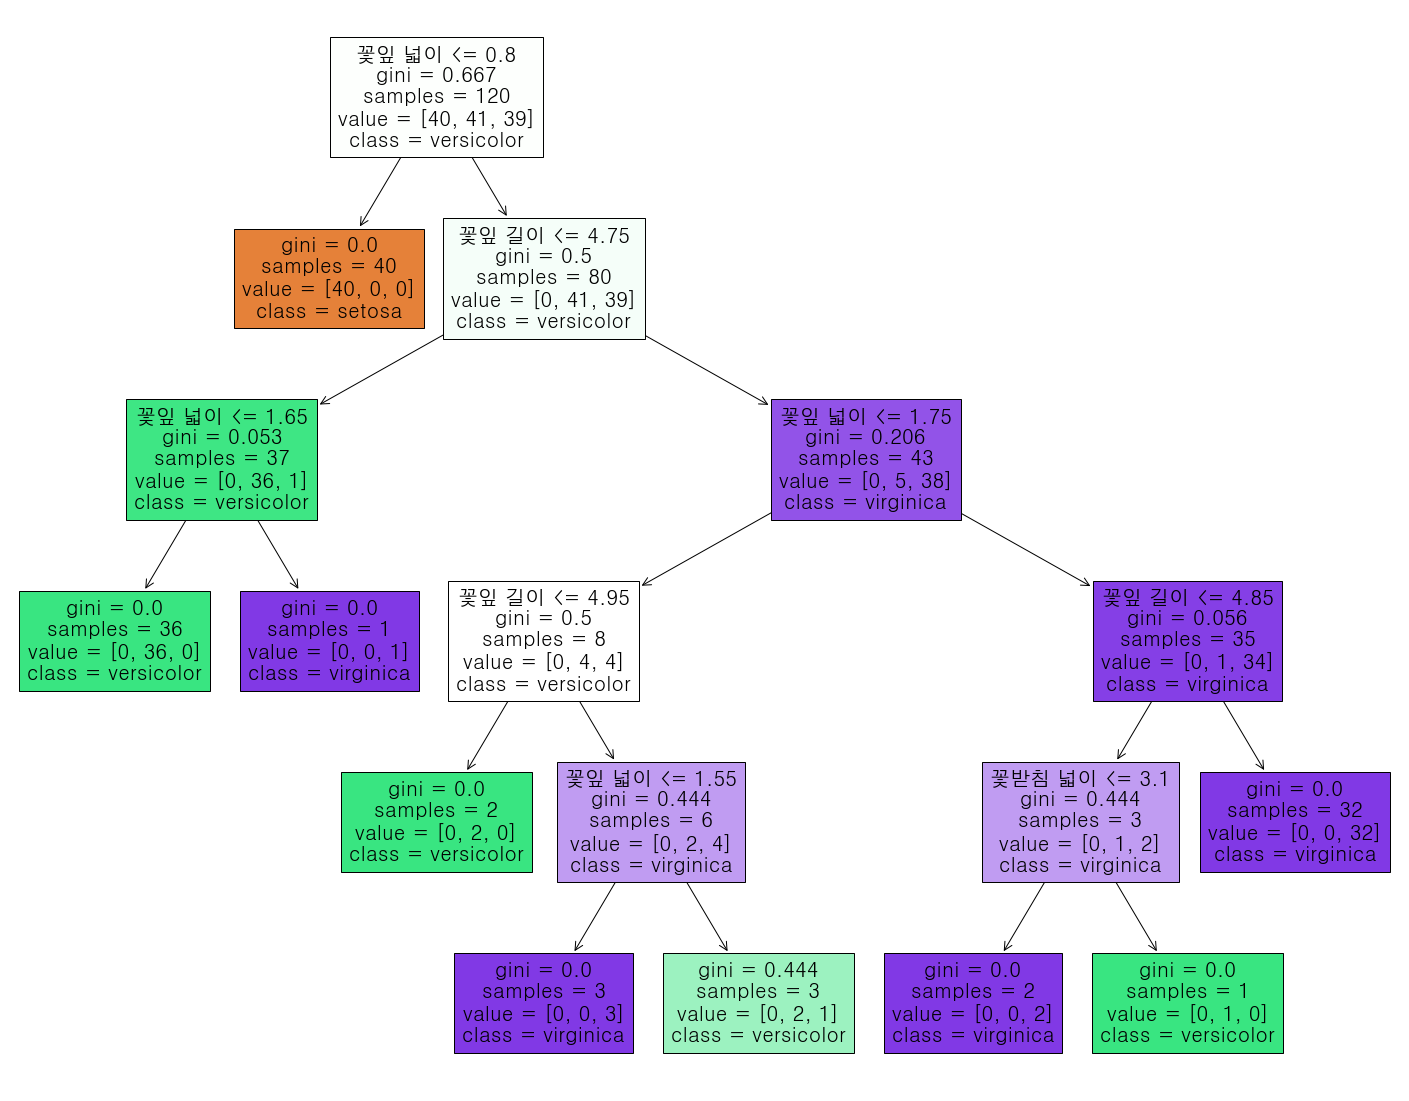

In [33]:
# 학습한 결과를 출력합니다

#폰트 경로
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
 
#폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()
 
#font 설정
matplotlib.rc('font',family=font_name)

plt.rc('font', family=font_name)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DTmodel, 
                   feature_names=['꽃받침 길이','꽃받침 넓이', '꽃잎 길이', '꽃잎 넓이'],  
                   class_names=['setosa', 'versicolor', 'virginica'],
                   filled=True)

plt.show()
# fig.savefig("decistion_tree.png")

## 실습 4. sklearn을 사용한 의사결정나무 - 예측하기

- [실습3]에서 학습한 모델을 바탕으로 새로운 데이터에 대해서 예측해보겠습니다.

- `test_X` 데이터에 따른 예측값을 구해봅시다.

#### DecisionTreeClassifier (sklearn)
- `DecisionTreeClassifier`을 사용하여 예측을 해야 한다면 아래와 같이 `predict` 함수를 사용합니다.
```
pred_X = DTmodel.predict(test_X)
```

#### 지시사항
1. `DTmodel`을 학습하고 `test_X`의 예측값을 구하여 `pred_X`에 저장합니다.

In [34]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

# sklearn에 저장된 데이터를 불러 옵니다.
X, Y = load_iris(return_X_y = True)

# DataFrame으로 변환
df = pd.DataFrame(X, columns=['꽃받침 길이','꽃받침 넓이', '꽃잎 길이', '꽃잎 넓이'])
df['클래스'] = Y

X = df.drop(columns=['클래스'])
Y = df['클래스']

In [35]:
# 학습용 평가용 데이터로 분리합니다
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state = 42)

# DTmodel에 의사결정나무 모델을 초기화 하고 학습합니다
DTmodel = DecisionTreeClassifier()
DTmodel.fit(train_X, train_Y)

DecisionTreeClassifier()

In [36]:
# test_X에 대해서 예측합니다.
pred_X = DTmodel.predict(test_X)
print('test_X에 대한 예측값 : \n{}'.format(pred_X))

test_X에 대한 예측값 : 
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


## 실습 5. 혼동 행렬(Confusion Matrix)

- 혼동 행렬(Confusion matrix)은 분류 문제에서 모델을 학습시킨 뒤, 모델에서 데이터의 X값을 집어넣어 얻은 예상되는 y값과, 실제 데이터의 y값을 비교하여 정확히 분류 되었는지 확인하는 메트릭(metric)이라고 할 수 있습니다.
![](https://cdn-api.elice.io/api-attachment/attachment/8a78486d2d8746a4aa5aa4415d3d0f45/image.png)

- 위 표가 바로 혼동 행렬이며, 각 표에 속한 값은 다음을 의미합니다.
    * True Positive (TP) : 실제 값은 Positive, 예측된 값도 Positive.
    * False Positive (FP) : 실제 값은 Negative, 예측된 값은 Positive.
    * False Negative (FN) : 실제 값은 Positive, 예측된 값은 Negative.
    * True Negative (TN) : 실제 값은 Negative, 예측된 값도 Negative.

- sklearn 안에는 위 4개 평가 값을 얻기 위해 사용할 수 있는 기능이 정의되어 있습니다.

- 이번 실습에서는 2개의 클래스를 가진 분류 데이터를 이용하여 혼동 행렬을 직접 출력해보고,확인해보도록 하겠습니다.

#### 혼동 행렬을 위한 사이킷런 함수/라이브러리

- `confusion_matrix(y_true, y_pred)`
    - Confusion matrix의 값을 np.ndarray로 반환해줍니다.

#### 데이터 정보

`load_breast_cancer` 유방암 유무 판별 데이터를 불러오는 함수

- X(Feature 데이터) : 30개의 환자 데이터
- Y(Label 데이터) : 0 음성(악성), 1 양성(정상)

#### 지시사항
1. `confusion_matrix`를 사용하여 `test_Y`에 대한 `confusion matrix`를 계산하여 `cm`에 저장해봅시다.

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# sklearn에 저장된 데이터를 불러 옵니다.
X, Y = load_breast_cancer(return_X_y = True)
X = np.array(X)
Y = np.array(Y)

# 데이터 정보를 출력합니다
print('전체 샘플 개수: ',len(X))
print('X의 feature 개수: ',len(X[0]))

전체 샘플 개수:  569
X의 feature 개수:  30


In [38]:
# 학습용 평가용 데이터로 분리합니다
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state = 42)

# 분리된 평가용 데이터 정보를 출력합니다
print('평가용 샘플 개수: ',len(test_Y))
print('클래스 0인 평가용 샘플 개수: ',len(test_Y)-sum(test_Y))
print('클래스 1인 평가용 샘플 개수: ',sum(test_Y),'\n')

평가용 샘플 개수:  114
클래스 0인 평가용 샘플 개수:  43
클래스 1인 평가용 샘플 개수:  71 



In [39]:
# DTmodel에 의사결정나무 모델을 초기화 하고 학습합니다
DTmodel = DecisionTreeClassifier()
DTmodel.fit(train_X, train_Y)

# test_X을 바탕으로 예측한 값을 저장합니다
y_pred = DTmodel.predict(test_X)

Confusion Matrix : 
 [[39  4]
 [ 3 68]]


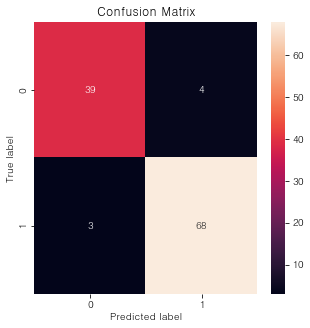

In [41]:
"""
1. 혼동 행렬을 계산합니다
"""
cm = confusion_matrix(test_Y, y_pred)
print('Confusion Matrix : \n {}'.format(cm))

# 혼동 행렬을 출력합니다
fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm, annot=True)
ax.set(title='Confusion Matrix',
            ylabel='True label',
            xlabel='Predicted label')
plt.show("decistion_tree.png")

## 실습 6. 정확도(Accuracy) 계산하기

- [실습5]의 결과를 바탕으로 분류 성능에 간단하면서도 중요한 정확도를 계산하여 모델의 성능을 판별해보겠습니다.

- 이번 실습에서는 학습용 데이터와 평가용 데이터의 정확도를 계산하고 그 성능을 비교해보겠습니다.

#### 정확도 계산을 위한 사이킷런 함수/라이브러리

- `DTmodel.score(train_X, train_Y)`
    : train_X 데이터에 대한 정확도(accuracy) 값을 계산합니다.


#### 지시사항
1. `score`를 사용하여 `train_X`에 대한 정확도를 계산하여 `acc_train`에 저장해봅시다.

2. `score`를 사용하여 `test_X`에 대한 정확도를 계산하여 `acc_test`에 저장해봅시다.

##### Tips!
`accuracy_score(Y_true, Y_pred)`을 이용하여 정확도를 구할 수 있습니다. `Y_true,Y_pred`는 각각 실제값과 예측값을 의미합니다.

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# sklearn에 저장된 데이터를 불러 옵니다.
X, Y = load_breast_cancer(return_X_y = True)
X = np.array(X)
Y = np.array(Y)

# 학습용 평가용 데이터로 분리합니다
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state = 42)

# 분리된 데이터 정보를 출력합니다
print('학습용 샘플 개수: ',len(train_Y))
print('클래스 0인 학습용 샘플 개수: ',len(train_Y)-sum(train_Y))
print('클래스 1인 학습용 샘플 개수: ',sum(train_Y),'\n')

print('평가용 샘플 개수: ',len(test_Y))
print('클래스 0인 평가용 샘플 개수: ',len(test_Y)-sum(test_Y))
print('클래스 1인 평가용 샘플 개수: ',sum(test_Y),'\n')


학습용 샘플 개수:  455
클래스 0인 학습용 샘플 개수:  169
클래스 1인 학습용 샘플 개수:  286 

평가용 샘플 개수:  114
클래스 0인 평가용 샘플 개수:  43
클래스 1인 평가용 샘플 개수:  71 



In [43]:
# DTmodel에 의사결정나무 모델을 초기화 하고 학습합니다
DTmodel = DecisionTreeClassifier()
DTmodel.fit(train_X, train_Y)


# 예측한 값을 저장합니다
y_pred_train = DTmodel.predict(train_X)
y_pred_test = DTmodel.predict(test_X)

# 혼동 행렬을 계산합니다
cm_train = confusion_matrix(train_Y, y_pred_train)
cm_test = confusion_matrix(test_Y, y_pred_test)
print('train_X Confusion Matrix : \n {}'.format(cm_train))
print('test_X Confusion Matrix : \n {}'.format(cm_test))


train_X Confusion Matrix : 
 [[169   0]
 [  0 286]]
test_X Confusion Matrix : 
 [[40  3]
 [ 5 66]]


In [44]:
"""
1. 정확도를 계산합니다.
"""
acc_train = DTmodel.score(train_X, train_Y)
acc_test = DTmodel.score(test_X, test_Y)

# 정확도를 출력합니다.
print('train_X Accuracy: %f' % (acc_train))
print('test_X Accuracy: %f' % (acc_test))

train_X Accuracy: 1.000000
test_X Accuracy: 0.929825


## 실습 7. 정밀도(Precision), 재현율(Recall) 계산하기

- [실습6]의 결과를 바탕으로 분류 지표 중 정밀도와 재현율을 계산하여 모델의 성능을 판별해보겠습니다.

- 이번 실습에서는 학습용 데이터와 평가용 데이터의 정밀도와 재현율을 계산하고 그 성능을 비교해보겠습니다.

#### 정밀도와 재현율 계산을 위한 사이킷런 함수/라이브러리

* `precision_score(train_Y, y_pred_train)`
    : 학습용 데이터에 대한 정밀도(precision) 값을 계산합니다.

* `recall_score(train_Y, y_pred_train)`
    : 학습용 데이터에 대한 재현율(recall) 값을 계산합니다.

#### 지시사항
1. `precision_score`를 사용하여 학습용, 평가용 데이터에 대한 정밀도를 계산하여 `precision_train, precision_test`에 저장해봅시다.

2. `recall_score`를 사용하여학습용, 평가용 데이터에 대한 재현율을 계산하여 `recall_train, recall_test`에 저장해봅시다.

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# sklearn에 저장된 데이터를 불러 옵니다.
X, Y = load_breast_cancer(return_X_y = True)
X = np.array(X)
Y = np.array(Y)

In [46]:
# 학습용 평가용 데이터로 분리합니다
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state = 42)

# DTmodel에 의사결정나무 모델을 초기화 하고 학습합니다
DTmodel = DecisionTreeClassifier()
DTmodel.fit(train_X, train_Y)

DecisionTreeClassifier()

In [47]:
# 예측한 값을 저장합니다
y_pred_train = DTmodel.predict(train_X)
y_pred_test = DTmodel.predict(test_X)

# 혼동 행렬을 계산합니다
cm_train = confusion_matrix(train_Y, y_pred_train)
cm_test = confusion_matrix(test_Y, y_pred_test)
print('train_X Confusion Matrix : \n {}'.format(cm_train))
print('test_X Confusion Matrix : \n {}'.format(cm_test),'\n')

train_X Confusion Matrix : 
 [[169   0]
 [  0 286]]
test_X Confusion Matrix : 
 [[40  3]
 [ 3 68]] 



In [48]:
"""
1. 정밀도를 계산합니다.
"""
precision_train = precision_score(train_Y, y_pred_train)
precision_test = precision_score(test_Y, y_pred_test)

# 정밀도를 출력합니다.
print('train_X Precision: %f' % (precision_train))
print('test_X Precision: %f' % (precision_test),'\n')

train_X Precision: 1.000000
test_X Precision: 0.957746 



In [49]:
"""
2. 재현율을 계산합니다.
"""
recall_train = recall_score(train_Y, y_pred_train)
recall_test = recall_score(test_Y, y_pred_test)

# 재현율을 출력합니다.
print('train_X Recall: %f' % (recall_train))
print('test_X Recall: %f' % (recall_test))

train_X Recall: 1.000000
test_X Recall: 0.957746
